### Requirements

In [1]:
# %pip install -r requirements.txt

### Dependencies

In [2]:
import os
import random
import torch
from torchvision import transforms as tvt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import csv
import pandas as pd
import re
import itertools


from pathlib import Path    # use this maybe for better cross-platform dependencies


### Global variables

In [3]:
# All CVR tasks
ALL_TASKS = {
    # elementary
    0: "task_shape",
    1: "task_pos",
    2: "task_size",
    3: "task_color",
    4: "task_rot",
    5: "task_flip",
    6: "task_count",
    7: "task_inside",
    8: "task_contact",
    # compositions
    9: "task_sym_rot",
    10: "task_sym_mir",
    11: "task_pos_pos_1",
    12: "task_pos_pos_2",
    13: "task_pos_count_2",
    14: "task_pos_count_1",
    15: "task_pos_pos_4",
    16: "task_pos_count_3",
    17: "task_inside_count_1",
    18: "task_count_count",
    19: "task_shape_shape",
    20: "task_shape_contact_2",
    21: "task_contact_contact_1",
    22: "task_inside_inside_1",
    23: "task_inside_inside_2",
    24: "task_pos_inside_3",
    25: "task_pos_inside_1",
    26: "task_pos_inside_2",
    27: "task_pos_inside_4",
    28: "task_rot_rot_1",
    29: "task_flip_flip_1",
    30: "task_rot_rot_3",
    31: "task_pos_pos_3",
    32: "task_pos_count_4",
    33: "task_size_size_1",
    34: "task_size_size_2",
    35: "task_size_size_3",
    36: "task_size_size_4",
    37: "task_size_size_5",
    38: "task_size_sym_1",
    39: "task_size_sym_2",
    40: "task_color_color_1",
    41: "task_color_color_2",
    42: "task_sym_sym_1",
    43: "task_sym_sym_2",
    44: "task_shape_contact_3",
    45: "task_shape_contact_4",
    46: "task_contact_contact_2",
    47: "task_pos_size_1",
    48: "task_pos_size_2",
    49: "task_pos_shape_1",
    50: "task_pos_shape_2",
    51: "task_pos_rot_1",
    52: "task_pos_rot_2",
    53: "task_pos_color_1",     # Note that we changed the name of the task from "task_pos_col_1" to "task_pos_color_1" compared to the original CVR dataset
    54: "task_pos_color_2",     # Note that we changed the name of the task from "task_pos_col_2" to "task_pos_color_2" compared to the original CVR dataset
    55: "task_pos_contact",
    56: "task_size_shape_1",
    57: "task_size_shape_2",
    58: "task_size_rot",
    59: "task_size_inside_1",
    60: "task_size_contact",
    61: "task_size_count_1",
    62: "task_size_count_2",
    63: "task_shape_color",
    64: "task_shape_color_2",
    65: "task_shape_color_3",
    66: "task_shape_inside",
    67: "task_shape_inside_1",
    68: "task_shape_count_1",
    69: "task_shape_count_2",
    70: "task_rot_color",
    71: "task_rot_inside_1",
    72: "task_rot_inside_2",
    73: "task_rot_count_1",
    74: "task_color_inside_1",
    75: "task_color_inside_2",
    76: "task_color_contact",
    77: "task_color_count_1",
    78: "task_color_count_2",
    79: "task_inside_contact",
    80: "task_contact_count_1",
    81: "task_contact_count_2",
    82: "task_size_color_1",
    83: "task_size_color_2",
    84: "task_color_sym_1",
    85: "task_color_sym_2",
    86: "task_shape_rot_1",
    87: "task_shape_contact_5",
    88: "task_rot_contact_1",
    89: "task_rot_contact_2",
    90: "task_inside_sym_mir",
    91: "task_flip_count_1",
    92: "task_flip_inside_1",
    93: "task_flip_inside_2",
    94: "task_flip_color_1",
    95: "task_shape_flip_1",
    96: "task_rot_flip_1",
    97: "task_size_flip_1",
    98: "task_pos_rot_3",
    99: "task_pos_flip_1",
    100: "task_pos_flip_2",
    101: "task_flip_contact_1",
    102: "task_flip_contact_2",
}

# Elementary tasks (tasks 0 to 8)
ELEMENTARY_TASKS = {k: ALL_TASKS[k] for k in range(9)}

# Compositions tasks (tasks 9 to 102)
COMPOSITE_TASKS = {k: ALL_TASKS[k] for k in range(9, 103)}


### Generation of Original Data

In [4]:
GENERATE_ORIGINAL_DATA = False

In [5]:
%load_ext autoreload
%autoreload 2

In [ ]:
if GENERATE_ORIGINAL_DATA:

    import os

    from tasks import TASKS
    from generalization_tasks import TASKS as TASKS_GEN
    from utils import render_ooo
    from generate_dataset import generate_dataset
    
    # What tasks to generate
    task_idx = 'all'

    # Input parameters
    data_dir = './generated_data'
    seed = 1997
    train_size = 10000
    val_size = 500
    test_size = 1000
    test_gen_size = 1000
    image_size = 128

    # Create folder
    if not os.path.exists('generated_data'):
        os.makedirs('generated_data')

    # To generate all the tasks (103)
    if task_idx == 'all':
        for i in range(0, 103):
            print(f"Generating task {i}")
            tn, tfn, _ = TASKS[i]
            _, tfn_g, _ = TASKS_GEN[i]
            generate_dataset(tn, tfn, tfn_g, data_dir, image_size, seed, train_size, val_size, test_size, test_gen_size)

    # To generate a specific task
    else:
        task_idx = int(task_idx)
        print(f"Generating task {task_idx}")
        tn, tfn, _ = TASKS[task_idx]
        _, tfn_g, _ = TASKS_GEN[task_idx]
        generate_dataset(tn, tfn, tfn_g, data_dir, image_size, seed, train_size, val_size, test_size, test_gen_size)


# python generate_dataset.py --data_dir ./generated_data_copy --task_idx a --seed 1997 --train_size 10000 --val_size 500 --test_size 1000 --test_gen_size 1000 --image_size 128     

In [7]:
# %pwd

### Pre-processing of Original Data

In [8]:
# Print all the composite tasks that contain a combination of two task names that belong to the list of elementary tasks
# For example, task_pos_pos_1 is a composite task that contains the elementary tasks task_pos and task_pos
# For example, task_pos_count_4 is a composite task that contains the elementary tasks task_pos and task_count
# Etc.

def get_true_composite_tasks():

    # Modify the name of the tasks that contain "col" as it means "color" and will facilitate the pre-procesing. The name will be changed back to "col" after the pre-processing.
    composite_tasks = COMPOSITE_TASKS.copy()
    composite_tasks_items = composite_tasks.items()
    elem_tasks_values = ELEMENTARY_TASKS.values()

    for key, value in composite_tasks.items():
        if "col" in value and "color" not in value:
            composite_tasks[key] = value.replace("col", "color")
    
    true_composite_tasks = []
    for task_id, task_name in composite_tasks_items:
        for elem_task in elem_tasks_values:
            for elem_task_2 in elem_tasks_values:
                if (elem_task in task_name and task_name.count(elem_task) == 2) or (elem_task in task_name and elem_task_2 in task_name and task_name.count(elem_task) == 1 and task_name.count(elem_task_2) == 1):
                    
                    # Sym is not an elementary rule
                    if "sym" in task_name:
                        continue
                    
                    else: 
                        true_composite_tasks.append(task_name)
    
    # Make sure to only keep the tasks with name in which the index is the lowest (or none) (index can go from 1 to 5)
    # Dictionary to store the smallest index for each base task
    task_dict = {}

    for task in true_composite_tasks:
        match = re.match(r"(.+?)(?:_(\d+))?$", task)  # extract base name and optional index
        if match:
            base_task, index = match.groups()
            index = int(index) if index is not None else 0  # treat no index as 0
            
            # Keep the task name with smallest index
            if base_task not in task_dict or index < task_dict[base_task]:
                task_dict[base_task] = index

    # Filter tasks that match the smallest index
    true_composite_tasks = [task for task in true_composite_tasks if re.match(r"(.+?)(?:_(\d+))?$", task) and int(re.match(r"(.+?)(?:_(\d+))?$", task).group(2) or 0) == task_dict[re.match(r"(.+?)(?:_(\d+))?$", task).group(1)]]

    print(true_composite_tasks)

    return true_composite_tasks


true_composite_tasks = get_true_composite_tasks()
for task in true_composite_tasks:
    print(task)

print(len(true_composite_tasks))
print("\n\n\n")

# Count the number of composite tasks that contain a name elem_name
def count_true_composite_tasks_containing_elem_name(true_composite_tasks, elem_name):
    count = 0
    for task_name in true_composite_tasks:
        if elem_name in task_name:
            print(task_name)
            count += 1
    return count

print("\n\n\n")

print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "shape"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "pos"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "size"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "color"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "rot"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "flip"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "count"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "inside"))
print(count_true_composite_tasks_containing_elem_name(true_composite_tasks, "contact"))



['task_pos_pos_1', 'task_pos_count_1', 'task_inside_count_1', 'task_count_count', 'task_shape_shape', 'task_shape_contact_2', 'task_contact_contact_1', 'task_inside_inside_1', 'task_pos_inside_1', 'task_rot_rot_1', 'task_flip_flip_1', 'task_size_size_1', 'task_color_color_1', 'task_pos_size_1', 'task_pos_shape_1', 'task_pos_rot_1', 'task_pos_color_1', 'task_pos_contact', 'task_size_shape_1', 'task_size_rot', 'task_size_inside_1', 'task_size_contact', 'task_size_count_1', 'task_shape_color', 'task_shape_inside', 'task_shape_count_1', 'task_rot_color', 'task_rot_inside_1', 'task_rot_count_1', 'task_color_inside_1', 'task_color_contact', 'task_color_count_1', 'task_inside_contact', 'task_contact_count_1', 'task_size_color_1', 'task_shape_rot_1', 'task_rot_contact_1', 'task_flip_count_1', 'task_flip_inside_1', 'task_flip_color_1', 'task_shape_flip_1', 'task_rot_flip_1', 'task_size_flip_1', 'task_pos_flip_1', 'task_flip_contact_1']
task_pos_pos_1
task_pos_count_1
task_inside_count_1
task_co

In [9]:
# The 9 "true" composite tasks (i.e., the composite tasks composed from the elementary tasks only) for each of the 9 elementary tasks are the following.
# However, an issue is that the index at the end of a task name does not seem to indicate the complexity level. It seems to simply indicate a variant of the task with slightly different parameter values? Thus, we consider the composite tasks with the lower index (or no index).

# Shape
# task_shape_shape
# task_pos_shape_1
# task_size_shape_1
# task_shape_color
# task_shape_inside
# task_shape_count_1
# task_shape_rot_1
# task_shape_flip_1
# task_shape_contact_2    <!-- There is no task_shape_contact or task_shape_contact_1, so here I added manually task_shape_contact_2 -->

# Pos
# task_pos_pos_1
# task_pos_count_1
# task_pos_inside_1
# task_pos_size_1
# task_pos_shape_1
# task_pos_rot_1
# task_pos_color_1      <!-- There is no task_color_pos or task_pos_color, but there is instead task_pos_col_1 that we renamed task_pos_color_1 -->
# task_pos_contact
# task_pos_flip_1

# Size
# task_size_size_1
# task_pos_size_1
# task_size_shape_1
# task_size_rot
# task_size_inside_1
# task_size_contact
# task_size_count_1
# task_size_color_1
# task_size_flip_1

# Color
# task_color_color_1
# task_shape_color
# task_rot_color
# task_color_inside_1
# task_color_contact
# task_color_count_1
# task_size_color_1
# task_flip_color_1
# task_pos_color_1 <!-- There is no task_color_pos or task_pos_color, but there is instead task_pos_col_1 that we renamed task_pos_color_1 --> 
# <!-- Note also that there is task_color_sym_1 -->

# Rot
# task_rot_rot_1
# task_pos_rot_1
# task_size_rot
# task_rot_color
# task_rot_inside_1
# task_rot_count_1
# task_shape_rot_1
# task_rot_contact_1
# task_rot_flip_1

# Flip
# task_flip_flip_1
# task_flip_count_1
# task_flip_inside_1
# task_flip_color_1
# task_shape_flip_1
# task_rot_flip_1
# task_size_flip_1
# task_pos_flip_1
# task_flip_contact_1

# Count
# task_pos_count_1
# task_inside_count_1
# task_count_count
# task_size_count_1
# task_shape_count_1
# task_rot_count_1
# task_color_count_1
# task_contact_count_1
# task_flip_count_1

# Inside
# task_inside_count_1
# task_inside_inside_1
# task_pos_inside_1
# task_size_inside_1
# task_shape_inside
# <!-- task_shape_inside_1 was removed as there is already a task_shape_inside -->
# task_rot_inside_1
# task_color_inside_1
# task_inside_contact
# task_flip_inside_1



# Contact
# task_contact_contact_1
# task_pos_contact
# task_size_contact
# task_color_contact
# task_inside_contact
# task_contact_count_1
# task_rot_contact_1
# task_flip_contact_1
# task_shape_contact_2    <!-- task_shape_contact_2 was added manually because there is no task_shape_contact or task_shape_contact_1-->

All the possible elementary tasks we will consider are: task_pos, task_rot, task_count, task_color. Now, we have to obtain the associated composite tasks.

In [10]:
# Only keep the composite tasks that contain the selected combination (in the variable true_composite_tasks above) of two task names that belong to the list of elementary tasks considered
def get_relevant_true_composite_tasks(true_composite_tasks, elem_name, irrelevant_elem_tasks):
    true_composite_tasks = [task.replace("task_", "") for task in true_composite_tasks]
    elem_name = elem_name.replace("task_", "")
    irrelevant_elem_tasks = [task.replace("task_", "") for task in irrelevant_elem_tasks]

    true_composite_tasks_containing_elem_name = []
    for task_name in true_composite_tasks:
        if elem_name in task_name and all(irrelevant_elem_task not in task_name for irrelevant_elem_task in irrelevant_elem_tasks):
            true_composite_tasks_containing_elem_name.append("task_"+task_name)
    return true_composite_tasks_containing_elem_name

# NOTE: this is dependent on all the tasks that we would like to consider in the experiments
relevant_composite_tasks = []
relevant_elem_tasks = ["task_pos", "task_rot", "task_count", "task_color"]
irrelevant_elem_tasks = ["task_shape", "task_size", "task_flip", "task_inside", "task_contact"]

for elem_task in relevant_elem_tasks:
    relevant_composite_tasks += get_relevant_true_composite_tasks(true_composite_tasks, elem_task, irrelevant_elem_tasks)

# Only keep unique task names as there are some duplicates
relevant_composite_tasks = list(set(relevant_composite_tasks))

print("We consider ", len(relevant_composite_tasks), " relevant composite tasks")
print("\n")
for task in relevant_composite_tasks:
    print(task)



We consider  10  relevant composite tasks


task_rot_color
task_color_count_1
task_pos_pos_1
task_color_color_1
task_pos_count_1
task_rot_count_1
task_count_count
task_pos_color_1
task_pos_rot_1
task_rot_rot_1


In [11]:
# Create a dictionary that maps the pairs of elementary tasks to the relevant composite tasks
def create_elem_task_pairs_to_composite_tasks_dict(relevant_elem_tasks, relevant_composite_tasks):
    print("Elementary tasks considered: ", relevant_elem_tasks)
    print("Composite tasks considered: ", relevant_composite_tasks)

    relevant_elem_tasks = [task.replace("task_", "") for task in relevant_elem_tasks]
    relevant_composite_tasks = [task.replace("task_", "") for task in relevant_composite_tasks]
    
    elem_task_pairs_to_composite_tasks_dict = {}
    for task_name in relevant_composite_tasks:
        elem_task_pairs = []
        # if task_name == "task_pos_col_1" or task_name == "task_pos_col_2":
            # task_name = task_name.replace("col", "color")
        for elem_task in relevant_elem_tasks:
            if elem_task in task_name:
                elem_task_pairs.append("task_"+elem_task)
        if len(elem_task_pairs) == 1:
            elem_task_pairs.append(elem_task_pairs[0])
        elem_task_pairs_to_composite_tasks_dict[tuple(elem_task_pairs)] = task_name
    return elem_task_pairs_to_composite_tasks_dict

elem_task_pairs_to_composite_tasks_dict = create_elem_task_pairs_to_composite_tasks_dict(relevant_elem_tasks, relevant_composite_tasks)

print("\n")
print(elem_task_pairs_to_composite_tasks_dict.keys())

print("\n")
for elem_task_pair, composite_task in elem_task_pairs_to_composite_tasks_dict.items():
    print(elem_task_pair, " -> ", composite_task)
print("\n")

# Example: access to the value associated with the key ('rot', 'rot')
# print(elem_task_pairs_to_composite_tasks_dict[('task_rot', 'task_rot')])

Elementary tasks considered:  ['task_pos', 'task_rot', 'task_count', 'task_color']
Composite tasks considered:  ['task_rot_color', 'task_color_count_1', 'task_pos_pos_1', 'task_color_color_1', 'task_pos_count_1', 'task_rot_count_1', 'task_count_count', 'task_pos_color_1', 'task_pos_rot_1', 'task_rot_rot_1']


dict_keys([('task_rot', 'task_color'), ('task_count', 'task_color'), ('task_pos', 'task_pos'), ('task_color', 'task_color'), ('task_pos', 'task_count'), ('task_rot', 'task_count'), ('task_count', 'task_count'), ('task_pos', 'task_color'), ('task_pos', 'task_rot'), ('task_rot', 'task_rot')])


('task_rot', 'task_color')  ->  rot_color
('task_count', 'task_color')  ->  color_count_1
('task_pos', 'task_pos')  ->  pos_pos_1
('task_color', 'task_color')  ->  color_color_1
('task_pos', 'task_count')  ->  pos_count_1
('task_rot', 'task_count')  ->  rot_count_1
('task_count', 'task_count')  ->  count_count
('task_pos', 'task_color')  ->  pos_color_1
('task_pos', 'task_rot')  ->  pos_rot_1

### General Functions and Classes

In [12]:
def create_samples_metadata_dataset(data_source_root, final_datasets_root, metadata_dataset_name):
    # List to store metadata
    metadata = []

    print("Creating metadata dataset...")
    print("Data source root: ", data_source_root)
    print("Final datasets root: ", final_datasets_root)
    print("Metadata dataset name: ", metadata_dataset_name)

    # Traverse the directory structure
    for root, dirs, files in os.walk(data_source_root):
        for file in files:
            # Collect filename and filepath
            filepath = os.path.join(root, file)

            # Get the current file name. This is the sample name.
            sample_file = os.path.basename(filepath)

            # Get the name of the parent folder of the file. This should be the split (evaluation mode): train, val, test or test_gen
            split_folder = os.path.basename(os.path.dirname(filepath))

            # Get the name of the grandparent folder of the file. This should be the task name
            task_folder = os.path.basename(os.path.dirname(os.path.dirname(filepath)))

            metadata.append([file, filepath, task_folder, split_folder, sample_file])

    # Write metadata to CSV
    metadata_dataset_path = f"{final_datasets_root}/{metadata_dataset_name}"
    with open(metadata_dataset_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['filename', 'filepath', 'task', 'split', 'sample_name'])
        writer.writerows(metadata)

    return metadata_dataset_path

In [13]:
# Subclass PyTorch Dataset so that it can then be loaded with a DataLoader
class CustomCVRDataset(Dataset):
    def __init__(self, csv_dataset_metadata, image_size=128, transform=None):
        super().__init__()

        # Get the samples paths from the dataset csv metadata file
        self.samples_paths = pd.read_csv(csv_dataset_metadata, header=0)['filepath'].values.flatten()
        self.n_samples = len(self.samples_paths)
        self.image_size = image_size
        self.transform = transform
        self.totensor = tvt.ToTensor()

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx): # NOTE: code partly taken from CVR repo

        sample_path =  self.samples_paths[idx]

        sample = Image.open(sample_path)
        sample = self.totensor(sample)
        img_size = sample.shape[1]
        pad = img_size - self.image_size

        # One sample is 4 RGB (i.e., 3 channels) images of size (img_size, img_size), where img_size = 128
        sample = sample.reshape([3, img_size, 4, img_size]).permute([2, 0, 1, 3])[:, :, pad//2:-pad//2, pad//2:-pad//2]

        if self.transform is not None:
            sample = self.transform(sample)

        return sample

In [14]:
import matplotlib.pyplot as plt

def display_images(x):
    # plt.figure(figsize=(15, 3))

    x_numpy = x[0, :, :, :].cpu().numpy()
    # put channels last
    x_numpy = x_numpy.transpose(1, 2, 0)
    plt.subplot(1, 4, 1)
    plt.imshow(x_numpy)

    x_numpy = x[1, :, :, :].cpu().numpy()
    # put channels last
    x_numpy = x_numpy.transpose(1, 2, 0)
    plt.subplot(1, 4, 2)
    plt.imshow(x_numpy)

    x_numpy = x[2, :, :, :].cpu().numpy()
    # put channels last
    x_numpy = x_numpy.transpose(1, 2, 0)
    plt.subplot(1, 4, 3)
    plt.imshow(x_numpy)

    x_numpy = x[3, :, :, :].cpu().numpy()
    # put channels last
    x_numpy = x_numpy.transpose(1, 2, 0)
    plt.subplot(1, 4, 4)
    plt.imshow(x_numpy)

    plt.subplots_adjust(wspace=0.5)
    plt.show()


In [15]:
# Sanity check

def check_CVR_dataloader(dataset_split_path):
    dataset = CustomCVRDataset(dataset_split_path)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

    for batch in dataloader:
        # print(batch)
        print("Batch shape: ", batch.shape)
        sample = batch[0]
        break

    # print(sample)
    print("Sample shape: ", sample.shape)

    display_images(sample)


In [16]:
def save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df, experiment_setting_datasets):
    print("Created path experiment setting: ", f"{study_folder_path}/exp_setting_{experiment_setting['index']}")
    # Save the selected samples to a CSV file with the experiment_setting index and split
    exp_setting_folder_path = f"{study_folder_path}/exp_setting_{experiment_setting['index']}"
    experiment_folder_path = f"{exp_setting_folder_path}/experiment_{experiment_index}"
    csv_dataset_split_path = f"{experiment_folder_path}/{split}.csv"
    os.makedirs(os.path.dirname(csv_dataset_split_path), exist_ok=True)
   
    data_df.to_csv(csv_dataset_split_path, index=False)
    
    print(f"New dataset created at at: {csv_dataset_split_path} \nStudy: {study} \nExperiment Setting: {experiment_setting['index']} \nExperiment: experiment_{experiment_index} \nSplit: {split}")
    
    experiment_setting_datasets[f'experiment_{experiment_index}'].update({f'{split}': CustomCVRDataset(csv_dataset_split_path)})

    return experiment_setting_datasets

In [17]:
def sample_perfectly_balanced_dataset(data_df, elem_tasks_pair_list, split_size_per_task):
    # NOTE: data_df should already be shuffled randomly

    # Ensure balanced samples per task
    balanced_data = []
    for task in elem_tasks_pair_list:
        task_data = data_df[data_df['task'] == task]
        task_data = task_data[:split_size_per_task]
        balanced_data.append(task_data)

    # Combine all balanced task data
    data_df = pd.concat(balanced_data).reset_index(drop=True)

    return data_df

In [18]:
def create_datasets_sample_efficiency(study_folder_path, metadata_pd, experiment_setting):
    study = "sample-efficiency"

    experiment_setting_datasets = {}

    assert len(experiment_setting['splits']) == 3, "The number of splits must be 3 (for train, val, test)"

    if experiment_setting['index'] == "1":
        experiment_index = 0

        for task in experiment_setting['elem_tasks']:
            for train_size, val_size, test_size in zip(experiment_setting['train_sizes'], experiment_setting['val_sizes'], experiment_setting['test_sizes']):
                experiment_index += 1

                experiment_setting_datasets.update({f"experiment_{experiment_index}": {}})

                split = 'train'
                data_df_train = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == 'train')]
                data_df_train = data_df_train.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_train = data_df_train[:train_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_train, experiment_setting_datasets)

                split = 'val'
                data_df_val = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == 'val')]
                data_df_val = data_df_val.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_val = data_df_val[:val_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_val, experiment_setting_datasets)

                split = 'test'
                data_df_test = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == 'test')]
                data_df_test = data_df_test.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_test = data_df_test[:test_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test, experiment_setting_datasets)

                # data_df = pd.concat([data_df_train, data_df_val, data_df_test], ignore_index=True)


    return experiment_setting_datasets

In [19]:
def create_datasets_compositionality(study_folder_path, metadata_pd, experiment_setting):
    study = "compositionality"

    experiment_setting_datasets = {}

    assert len(experiment_setting['splits']) == 3, "The number of splits must be 3 (for train, val, test)"

    if experiment_setting['index'] == "1":
        experiment_index = 0

        elem_task_pairs_to_composite_tasks_matching = experiment_setting['elem_task_pairs_to_composite_tasks_matching']

        for elem_tasks_pair in itertools.combinations_with_replacement(experiment_setting['elem_tasks'], 2):
            for comp_task in experiment_setting['comp_tasks']:
                elem_tasks_pair_tuple = tuple(elem_tasks_pair)
                elem_tasks_pair_list = list(elem_tasks_pair_tuple)

                if comp_task == ("task_" + elem_task_pairs_to_composite_tasks_matching[elem_tasks_pair_tuple]):
                    for train_size, val_size, test_size in zip(experiment_setting['train_sizes'], experiment_setting['val_sizes'], experiment_setting['test_sizes']):
                        experiment_index += 1

                        experiment_setting_datasets.update({f"experiment_{experiment_index}": {}})

                        split = 'train'
                        train_size_per_task = train_size // len(elem_tasks_pair_list)
                        data_df_train = metadata_pd[((metadata_pd['task'] == elem_tasks_pair_list[0]) | (metadata_pd['task'] == elem_tasks_pair_list[1])) & (metadata_pd['split'] == split)]
                        data_df_train = data_df_train.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_train = sample_perfectly_balanced_dataset(data_df_train, elem_tasks_pair_list, train_size_per_task)     # if we want to sample a perfectly balanced dataset, otherwise comment it
                        data_df_train = data_df_train[:train_size]
                        
                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_train, experiment_setting_datasets)

                        split = 'val'
                        data_df_val = metadata_pd[(metadata_pd['task'] == comp_task) & (metadata_pd['split'] == split)]
                        data_df_val = data_df_val.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_val = data_df_val[:val_size]

                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_val, experiment_setting_datasets)

                        split = 'test'
                        data_df_test = metadata_pd[(metadata_pd['task'] == comp_task) & (metadata_pd['split'] == split)]
                        data_df_test = data_df_test.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_test = data_df_test[:test_size]

                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test, experiment_setting_datasets)

                        # data_df = pd.concat([data_df_train, data_df_val, data_df_test], ignore_index=True)


    if experiment_setting['index'] == "2":
        experiment_index = 0

        elem_task_pairs_to_composite_tasks_matching = experiment_setting['elem_task_pairs_to_composite_tasks_matching']

        for elem_tasks_pair in itertools.combinations_with_replacement(experiment_setting['elem_tasks'], 2):
            for comp_task in experiment_setting['comp_tasks']:
                elem_tasks_pair_tuple = tuple(elem_tasks_pair)
                elem_tasks_pair_list = list(elem_tasks_pair_tuple)

                if comp_task == ("task_" + elem_task_pairs_to_composite_tasks_matching[elem_tasks_pair_tuple]):
                    
                    for train_size, val_size, test_size in zip(experiment_setting['train_sizes'], experiment_setting['val_sizes'], experiment_setting['test_sizes']):
                        experiment_index += 1

                        experiment_setting_datasets.update({f"experiment_{experiment_index}": {}})

                        split = 'train'
                        data_df_train = metadata_pd[(metadata_pd['task'] == comp_task) & (metadata_pd['split'] == split)]
                        data_df_train = data_df_train.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_train = data_df_train[:train_size]

                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_train, experiment_setting_datasets)

                        split = 'val'
                        val_size_per_task = val_size // len(elem_tasks_pair_list)
                        data_df_val = metadata_pd[((metadata_pd['task'] == elem_tasks_pair[0]) | (metadata_pd['task'] == elem_tasks_pair[1])) & (metadata_pd['split'] == split)]
                        data_df_val = data_df_val.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_val = sample_perfectly_balanced_dataset(data_df_val, elem_tasks_pair_list, val_size_per_task)     # if we want to sample a perfectly balanced dataset, otherwise comment it
                        data_df_val = data_df_val[:val_size]

                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_val, experiment_setting_datasets)

                        split = 'test'
                        test_size_per_task = test_size // len(elem_tasks_pair_list)
                        data_df_test = metadata_pd[((metadata_pd['task'] == elem_tasks_pair[0]) | (metadata_pd['task'] == elem_tasks_pair[1])) & (metadata_pd['split'] == split)]
                        data_df_test = data_df_test.sample(frac=1, random_state=1997).reset_index(drop=True)
                        data_df_test = sample_perfectly_balanced_dataset(data_df_test, elem_tasks_pair_list, test_size_per_task)     # if we want to sample a perfectly balanced dataset, otherwise comment it
                        data_df_test = data_df_test[:test_size]

                        experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test, experiment_setting_datasets)

                        # data_df = pd.concat([data_df_train, data_df_val, data_df_test], ignore_index=True)


    if experiment_setting['index'] == "3":
        experiment_index = 0

        for comp_task in experiment_setting['comp_tasks']:
            all_other_comp_tasks = [task for task in experiment_setting['comp_tasks'] if task != comp_task]

            for train_size, val_size, test_size in zip(experiment_setting['train_sizes'], experiment_setting['val_sizes'], experiment_setting['test_sizes']):
                experiment_index += 1

                experiment_setting_datasets.update({f"experiment_{experiment_index}": {}})

                split = 'train'
                train_size_per_task = train_size // len(all_other_comp_tasks)
                data_df_train = metadata_pd[(metadata_pd['task'].isin(all_other_comp_tasks)) & (metadata_pd['split'] == split)]
                data_df_train = data_df_train.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_train = sample_perfectly_balanced_dataset(data_df_train, all_other_comp_tasks, train_size_per_task)     # if we want to sample a perfectly balanced dataset, otherwise comment it
                data_df_train = data_df_train[:train_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_train, experiment_setting_datasets)

                split = 'val'
                data_df_val = metadata_pd[(metadata_pd['task'] == comp_task) & (metadata_pd['split'] == split)]
                data_df_val = data_df_val.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_val = data_df_val[:val_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_val, experiment_setting_datasets)

                split = 'test'
                data_df_test = metadata_pd[(metadata_pd['task'] == comp_task) & (metadata_pd['split'] == split)]
                data_df_test = data_df_test.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_test = data_df_test[:test_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test, experiment_setting_datasets)

                # data_df = pd.concat([data_df_train, data_df_val, data_df_test], ignore_index=True)


    return experiment_setting_datasets
    

In [20]:
def create_datasets_systematic_generalization(study_folder_path, metadata_pd, experiment_setting):
    study = "sys-gen"

    experiment_setting_datasets = {}

    assert len(experiment_setting['splits']) == 4, "The number of splits must be 4 (for train, val, test, test_gen)"

    if experiment_setting['index'] == "1":
        experiment_index = 0

        for task in experiment_setting['elem_tasks']:
            for train_size, val_size, test_size in zip(experiment_setting['train_sizes'], experiment_setting['val_sizes'], experiment_setting['test_sizes']):
                experiment_index += 1

                experiment_setting_datasets.update({f"experiment_{experiment_index}": {}})

                split = 'train'
                data_df_train = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == split)]
                data_df_train = data_df_train.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_train = data_df_train[:train_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_train, experiment_setting_datasets)

                split = 'val'
                data_df_val = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == split)]
                data_df_val = data_df_val.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_val = data_df_val[:val_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_val, experiment_setting_datasets)

                split = 'test'
                data_df_test = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == split)]
                data_df_test = data_df_test.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_test = data_df_test[:test_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test, experiment_setting_datasets)

                split = 'test_gen'
                data_df_test_gen = metadata_pd[(metadata_pd['task'] == task) & (metadata_pd['split'] == split)]
                data_df_test_gen = data_df_test_gen.sample(frac=1, random_state=1997).reset_index(drop=True)
                data_df_test_gen = data_df_test_gen[:test_size]

                experiment_setting_datasets = save_new_dataset_split(study_folder_path, study, experiment_setting, experiment_index, split, data_df_test_gen, experiment_setting_datasets)

                # data_df = pd.concat([data_df_train, data_df_val, data_df_test, data_df_test_gen], ignore_index=True)

    return experiment_setting_datasets


In [21]:
def create_dataset(csv_metadata_path, study_folder_path, study, experiment_setting):

    metadata_pd = pd.read_csv(csv_metadata_path)

    if study == "sample-efficiency":
        experiment_setting_datasets = create_datasets_sample_efficiency(study_folder_path, metadata_pd, experiment_setting)
        print(f"Sample efficiency datasets created for: {experiment_setting_datasets.keys()}\n ")


    elif study == "compositionality":
        experiment_setting_datasets = create_datasets_compositionality(study_folder_path, metadata_pd, experiment_setting)
        print(f"Compositionality datasets created for: {experiment_setting_datasets.keys()}\n ")


    elif study == "sys-gen":
        experiment_setting_datasets = create_datasets_systematic_generalization(study_folder_path, metadata_pd, experiment_setting)
        print(f"Systematic Generalization datasets created for: {experiment_setting_datasets.keys()}\n ")


    else:
        raise ValueError("Study must be one of 'sample-efficiency', 'compositionality', or 'sys-gen'")


In [22]:
def get_tasks_info(data_csv_path):
    data = pd.read_csv(data_csv_path)

    # Check how many different tasks are in the data
    print("Different tasks in this dataset split: \n", data['task'].unique())

    print("\n")

    # Check how many samples per task are in the data
    print("Number of samples per task in this dataset split: \n", data['task'].value_counts())

### Main

In [23]:
# Define the folders for each dataset
# data_environment = "CVR"
data_source_root = f"./generated_data"  # Root directory for datasets
final_datasets_root = f"./final_datasets"  # Root directory for datasets

# Define and create the directories for each dataset setting
sample_efficiency_dir = f"{final_datasets_root}/sample-efficiency"
compositionality_dir = f"{final_datasets_root}/compositionality"
sys_gen_dir = f"{final_datasets_root}/sys-gen"

os.makedirs(sample_efficiency_dir, exist_ok=True)
os.makedirs(compositionality_dir, exist_ok=True)
os.makedirs(sys_gen_dir, exist_ok=True)

print(f"Data source root: {data_source_root}")
print(f"Final datasets root: {final_datasets_root}")

print(f"Sample efficiency folder: {sample_efficiency_dir}")
print(f"Compositionality folder: {compositionality_dir}")
print(f"Systematic Generalization folder: {sys_gen_dir}")

# Create the paths to the data folders above
all_tasks_data_folders = [f"{data_source_root}/{task}" for task in [task for task in ALL_TASKS.values()]]
elementary_tasks_data_folders = [f"{data_source_root}/{task}" for task in [task for task in ELEMENTARY_TASKS.values()]]
composite_tasks_data_folders = [f"{data_source_root}/{task}" for task in [task for task in COMPOSITE_TASKS.values()]]

print("ALL TASKS data folders: ", all_tasks_data_folders)
print("ELEMENTARY TASKS data folders: ", elementary_tasks_data_folders)
print("COMPOSITIONS TASKS data folders: ", composite_tasks_data_folders)


Data source root: ./generated_data
Final datasets root: ./final_datasets
Sample efficiency folder: ./final_datasets/sample-efficiency
Compositionality folder: ./final_datasets/compositionality
Systematic Generalization folder: ./final_datasets/sys-gen
ALL TASKS data folders:  ['./generated_data/task_shape', './generated_data/task_pos', './generated_data/task_size', './generated_data/task_color', './generated_data/task_rot', './generated_data/task_flip', './generated_data/task_count', './generated_data/task_inside', './generated_data/task_contact', './generated_data/task_sym_rot', './generated_data/task_sym_mir', './generated_data/task_pos_pos_1', './generated_data/task_pos_pos_2', './generated_data/task_pos_count_2', './generated_data/task_pos_count_1', './generated_data/task_pos_pos_4', './generated_data/task_pos_count_3', './generated_data/task_inside_count_1', './generated_data/task_count_count', './generated_data/task_shape_shape', './generated_data/task_shape_contact_2', './genera

In [24]:
metadata_dataset_name = 'all_samples_metadata.csv'
metadata_dataset_path = f"{final_datasets_root}/{metadata_dataset_name}"
if not os.path.exists(metadata_dataset_path):
    # Collect metadata and write to CSV
    metadata_dataset_path = create_samples_metadata_dataset(data_source_root, final_datasets_root, metadata_dataset_name=metadata_dataset_name)
    print("A new metadata file was created at: ", metadata_dataset_path)
else:
    print("The metadata file was not re-created as it already exists at: ", metadata_dataset_path)

# Load the metadata file to a pandaframe
metadata_pd = pd.read_csv(metadata_dataset_path, delimiter=',', header=0)
metadata_pd.head()

# Print a summary of the metadata pandaframe
print(metadata_pd.info())

The metadata file was not re-created as it already exists at:  ./final_datasets/all_samples_metadata.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287500 entries, 0 to 1287499
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   filename     1287500 non-null  object
 1   filepath     1287500 non-null  object
 2   task         1287500 non-null  object
 3   split        1287500 non-null  object
 4   sample_name  1287500 non-null  object
dtypes: object(5)
memory usage: 49.1+ MB
None


## Studies

### Sample-Efficiency

In [25]:
random.seed(1997)
torch.manual_seed(1997)

In [26]:
study = "sample-efficiency"

In [27]:
# ** Experiment setting 1: Best Performance for Varying Number N of Samples **

# We consider the elementary tasks "task_pos" and "task_rot"
# We create train datasets of size N_train = 100, 500, 1000, 2500, 5000, 10000
# We create val datasets of size N_val = 500
# We create test datasets of size N_test = 1000

splits = ['train', 'val', 'test']
experiment_setting_base = {'index': "1", 'splits': splits}

elem_tasks = ["task_pos", "task_rot"]

train_sizes = [100, 500, 1000, 2500, 5000, 10000]
val_sizes = [500] * len(train_sizes)
test_sizes = [1000] * len(train_sizes)

experiment_setting = {**experiment_setting_base, 
                      'elem_tasks': elem_tasks, 
                      'train_sizes': train_sizes, 
                      'val_sizes': val_sizes, 
                      'test_sizes': test_sizes}

create_dataset(metadata_dataset_path, sample_efficiency_dir, study, experiment_setting)


Created path experiment setting:  ./final_datasets/sample-efficiency/exp_setting_1
New dataset created at at: ./final_datasets/sample-efficiency/exp_setting_1/experiment_1/train.csv 
Study: sample-efficiency 
Experiment Setting: 1 
Experiment: experiment_1 
Split: train
Created path experiment setting:  ./final_datasets/sample-efficiency/exp_setting_1
New dataset created at at: ./final_datasets/sample-efficiency/exp_setting_1/experiment_1/val.csv 
Study: sample-efficiency 
Experiment Setting: 1 
Experiment: experiment_1 
Split: val
Created path experiment setting:  ./final_datasets/sample-efficiency/exp_setting_1
New dataset created at at: ./final_datasets/sample-efficiency/exp_setting_1/experiment_1/test.csv 
Study: sample-efficiency 
Experiment Setting: 1 
Experiment: experiment_1 
Split: test
Created path experiment setting:  ./final_datasets/sample-efficiency/exp_setting_1
New dataset created at at: ./final_datasets/sample-efficiency/exp_setting_1/experiment_2/train.csv 
Study: sam

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


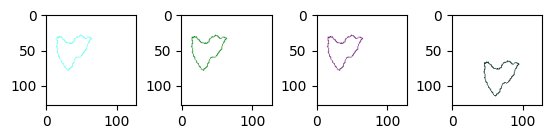

Different tasks in this dataset split: 
 ['task_pos']


Number of samples per task in this dataset split: 
 task
task_pos    500
Name: count, dtype: int64


In [28]:
dataset_train_path = "./final_datasets/sample-efficiency/exp_setting_1/experiment_2/train.csv"
check_CVR_dataloader(dataset_train_path)
get_tasks_info(dataset_train_path)

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


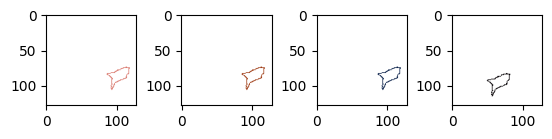

Different tasks in this dataset split: 
 ['task_pos']


Number of samples per task in this dataset split: 
 task
task_pos    1000
Name: count, dtype: int64


In [29]:
dataset_test_path = "./final_datasets/sample-efficiency/exp_setting_1/experiment_2/test.csv"
check_CVR_dataloader(dataset_test_path)
get_tasks_info(dataset_test_path)

### Compositionality

In [30]:
random.seed(1997)
torch.manual_seed(1997)

In [31]:
study = "compositionality"

In [32]:
# ** Experiment setting 1: Composition from Elementary to Composite **

# We consider the elementary tasks: "task_pos", "task_rot", "task_count", "task_color"
# We consider the composite tasks: task_rot_rot_1, task_count_count, task_color_color_1, task_pos_rot_1, task_color_count_1, task_rot_count_1, task_rot_color, task_pos_pos_1, task_pos_color_1, task_pos_count_1
# We create train datasets of size N_train = 10000
# We create val datasets of size N_val = 500
# We create test datasets of size N_test = 1000

splits = ['train', 'val', 'test']
experiment_setting_base = {'index': "1", 'splits': splits}

elem_tasks = ["task_pos", "task_rot", "task_count", "task_color"]
comp_tasks = ["task_rot_rot_1", "task_count_count", "task_color_color_1", "task_pos_rot_1", "task_color_count_1", "task_rot_count_1", "task_rot_color", "task_pos_pos_1", "task_pos_color_1", "task_pos_count_1"]

elem_task_pairs_to_composite_tasks_matching = create_elem_task_pairs_to_composite_tasks_dict(elem_tasks, comp_tasks)
print(elem_task_pairs_to_composite_tasks_matching)

train_sizes = [10000]
val_sizes = [500] * len(train_sizes)
test_sizes = [1000] * len(train_sizes)

experiment_setting = {**experiment_setting_base, 
                      'elem_tasks': elem_tasks,
                      'comp_tasks': comp_tasks,
                      'elem_task_pairs_to_composite_tasks_matching': elem_task_pairs_to_composite_tasks_matching,
                      'train_sizes': train_sizes, 
                      'val_sizes': val_sizes, 
                      'test_sizes': test_sizes,
                      }

create_dataset(metadata_dataset_path, compositionality_dir, study, experiment_setting)

Elementary tasks considered:  ['task_pos', 'task_rot', 'task_count', 'task_color']
Composite tasks considered:  ['task_rot_rot_1', 'task_count_count', 'task_color_color_1', 'task_pos_rot_1', 'task_color_count_1', 'task_rot_count_1', 'task_rot_color', 'task_pos_pos_1', 'task_pos_color_1', 'task_pos_count_1']
{('task_rot', 'task_rot'): 'rot_rot_1', ('task_count', 'task_count'): 'count_count', ('task_color', 'task_color'): 'color_color_1', ('task_pos', 'task_rot'): 'pos_rot_1', ('task_count', 'task_color'): 'color_count_1', ('task_rot', 'task_count'): 'rot_count_1', ('task_rot', 'task_color'): 'rot_color', ('task_pos', 'task_pos'): 'pos_pos_1', ('task_pos', 'task_color'): 'pos_color_1', ('task_pos', 'task_count'): 'pos_count_1'}
Created path experiment setting:  ./final_datasets/compositionality/exp_setting_1
New dataset created at at: ./final_datasets/compositionality/exp_setting_1/experiment_1/train.csv 
Study: compositionality 
Experiment Setting: 1 
Experiment: experiment_1 
Split: tr

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


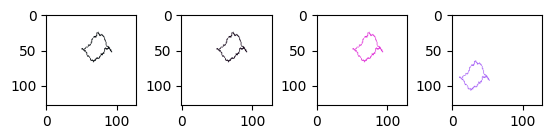

Different tasks in this dataset split: 
 ['task_pos' 'task_rot']


Number of samples per task in this dataset split: 
 task
task_pos    5000
task_rot    5000
Name: count, dtype: int64


In [33]:
dataset_train_path = "./final_datasets/compositionality/exp_setting_1/experiment_2/train.csv"
check_CVR_dataloader(dataset_train_path)
get_tasks_info(dataset_train_path)

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


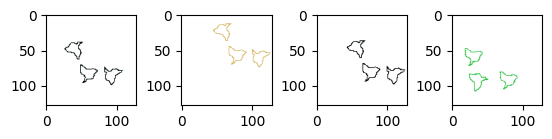

Different tasks in this dataset split: 
 ['task_pos_rot_1']


Number of samples per task in this dataset split: 
 task
task_pos_rot_1    1000
Name: count, dtype: int64


In [34]:
dataset_test_path = "./final_datasets/compositionality/exp_setting_1/experiment_2/test.csv"
check_CVR_dataloader(dataset_test_path)
get_tasks_info(dataset_test_path)


In [35]:
# ** Experiment setting 2: Decomposition from Composite to Elementary **

# We consider the elementary tasks: "task_pos", "task_rot", "task_count", "task_color"
# We consider the composite tasks: task_rot_rot_1, task_count_count, task_color_color_1, task_pos_rot_1, task_color_count_1, task_rot_count_1, task_rot_color, task_pos_pos_1, task_pos_color_1, task_pos_count_1
# We create train datasets of size N_train = 10000
# We create val datasets of size N_val = 500
# We create test datasets of size N_test = 1000

splits = ['train', 'val', 'test']
experiment_setting_base = {'index': "2", 'splits': splits}

elem_tasks = ["task_pos", "task_rot", "task_count", "task_color"]
comp_tasks = ["task_rot_rot_1", "task_count_count", "task_color_color_1", "task_pos_rot_1", "task_color_count_1", "task_rot_count_1", "task_rot_color", "task_pos_pos_1", "task_pos_color_1", "task_pos_count_1"]

elem_task_pairs_to_composite_tasks_matching = create_elem_task_pairs_to_composite_tasks_dict(elem_tasks, comp_tasks)
print(elem_task_pairs_to_composite_tasks_matching)

train_sizes = [10000]
val_sizes = [500] * len(train_sizes)
test_sizes = [1000] * len(train_sizes)

experiment_setting = {**experiment_setting_base, 
                      'elem_tasks': elem_tasks,
                      'comp_tasks': comp_tasks,
                      'elem_task_pairs_to_composite_tasks_matching': elem_task_pairs_to_composite_tasks_matching,
                      'train_sizes': train_sizes,
                      'val_sizes': val_sizes, 
                      'test_sizes': test_sizes,
                      }

create_dataset(metadata_dataset_path, compositionality_dir, study, experiment_setting)

Elementary tasks considered:  ['task_pos', 'task_rot', 'task_count', 'task_color']
Composite tasks considered:  ['task_rot_rot_1', 'task_count_count', 'task_color_color_1', 'task_pos_rot_1', 'task_color_count_1', 'task_rot_count_1', 'task_rot_color', 'task_pos_pos_1', 'task_pos_color_1', 'task_pos_count_1']
{('task_rot', 'task_rot'): 'rot_rot_1', ('task_count', 'task_count'): 'count_count', ('task_color', 'task_color'): 'color_color_1', ('task_pos', 'task_rot'): 'pos_rot_1', ('task_count', 'task_color'): 'color_count_1', ('task_rot', 'task_count'): 'rot_count_1', ('task_rot', 'task_color'): 'rot_color', ('task_pos', 'task_pos'): 'pos_pos_1', ('task_pos', 'task_color'): 'pos_color_1', ('task_pos', 'task_count'): 'pos_count_1'}
Created path experiment setting:  ./final_datasets/compositionality/exp_setting_2
New dataset created at at: ./final_datasets/compositionality/exp_setting_2/experiment_1/train.csv 
Study: compositionality 
Experiment Setting: 2 
Experiment: experiment_1 
Split: tr

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


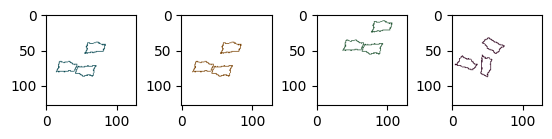

Different tasks in this dataset split: 
 ['task_pos_rot_1']


Number of samples per task in this dataset split: 
 task
task_pos_rot_1    10000
Name: count, dtype: int64


In [36]:
dataset_train_path = "./final_datasets/compositionality/exp_setting_2/experiment_2/train.csv"
check_CVR_dataloader(dataset_train_path)
get_tasks_info(dataset_train_path)

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


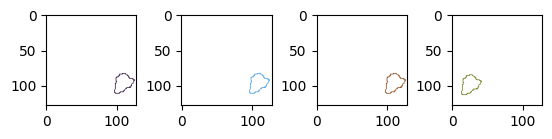

Different tasks in this dataset split: 
 ['task_pos' 'task_rot']


Number of samples per task in this dataset split: 
 task
task_pos    500
task_rot    500
Name: count, dtype: int64


In [37]:
dataset_testt_path = "./final_datasets/compositionality/exp_setting_2/experiment_2/test.csv"
check_CVR_dataloader(dataset_testt_path)
get_tasks_info(dataset_testt_path)

In [38]:
# ** Experiment setting 3: From Composite to Unseen Composite **

# We consider the composite tasks: task_rot_rot_1, task_count_count, task_color_color_1, task_pos_rot_1, task_color_count_1, task_rot_count_1, task_rot_color, task_pos_pos_1, task_pos_col_1, task_pos_count_1
# We create train datasets of size N_train = 10000
# We create val datasets of size N_val = 500
# We create test datasets of size N_test = 1000

splits = ['train', 'val', 'test']
experiment_setting_base = {'index': "3", 'splits': splits}

comp_tasks = ["task_rot_rot_1", "task_count_count", "task_color_color_1", "task_pos_rot_1", "task_color_count_1", "task_rot_count_1", "task_rot_color", "task_pos_pos_1", "task_pos_color_1", "task_pos_count_1"]

train_sizes = [10000]
val_sizes = [500] * len(train_sizes)
test_sizes = [1000] * len(train_sizes)

experiment_setting = {**experiment_setting_base, 
                      'comp_tasks': comp_tasks,
                      'train_sizes': train_sizes, 
                      'val_sizes': val_sizes, 
                      'test_sizes': test_sizes,
                      }

create_dataset(metadata_dataset_path, compositionality_dir, study, experiment_setting)

Created path experiment setting:  ./final_datasets/compositionality/exp_setting_3
New dataset created at at: ./final_datasets/compositionality/exp_setting_3/experiment_1/train.csv 
Study: compositionality 
Experiment Setting: 3 
Experiment: experiment_1 
Split: train
Created path experiment setting:  ./final_datasets/compositionality/exp_setting_3
New dataset created at at: ./final_datasets/compositionality/exp_setting_3/experiment_1/val.csv 
Study: compositionality 
Experiment Setting: 3 
Experiment: experiment_1 
Split: val
Created path experiment setting:  ./final_datasets/compositionality/exp_setting_3
New dataset created at at: ./final_datasets/compositionality/exp_setting_3/experiment_1/test.csv 
Study: compositionality 
Experiment Setting: 3 
Experiment: experiment_1 
Split: test
Created path experiment setting:  ./final_datasets/compositionality/exp_setting_3
New dataset created at at: ./final_datasets/compositionality/exp_setting_3/experiment_2/train.csv 
Study: compositionali

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


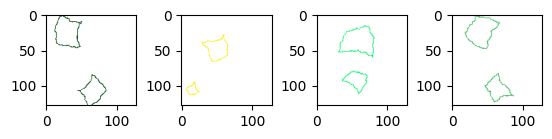

Different tasks in this dataset split: 
 ['task_rot_rot_1' 'task_color_color_1' 'task_pos_rot_1'
 'task_color_count_1' 'task_rot_count_1' 'task_rot_color' 'task_pos_pos_1'
 'task_pos_color_1' 'task_pos_count_1']


Number of samples per task in this dataset split: 
 task
task_rot_rot_1        1111
task_color_color_1    1111
task_pos_rot_1        1111
task_color_count_1    1111
task_rot_count_1      1111
task_rot_color        1111
task_pos_pos_1        1111
task_pos_color_1      1111
task_pos_count_1      1111
Name: count, dtype: int64


In [39]:
dataset_train_path = "./final_datasets/compositionality/exp_setting_3/experiment_2/train.csv"
check_CVR_dataloader(dataset_train_path)
get_tasks_info(dataset_train_path)

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


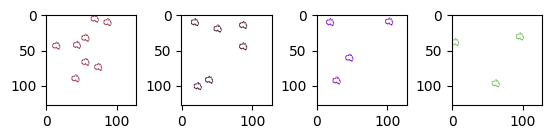

Different tasks in this dataset split: 
 ['task_count_count']


Number of samples per task in this dataset split: 
 task
task_count_count    1000
Name: count, dtype: int64


In [40]:
dataset_test_path = "./final_datasets/compositionality/exp_setting_3/experiment_2/test.csv"
check_CVR_dataloader(dataset_test_path)
get_tasks_info(dataset_test_path)

### Systematic Generalization

In [41]:
random.seed(1997)
torch.manual_seed(1997)

In [42]:
study = "sys-gen"

In [43]:
# ** Experiment setting 1: Various Parameters Randomness Difficulty **

# We consider the elementary tasks "task_pos" and "task_rot"
# We create train datasets of size N_train = 5000
# We create val datasets of size N_val = 500
# We create test datasets of size N_test = 1000
# We create test_gen datasets of size N_test_gen = 1000

splits = ['train', 'val', 'test', 'test_gen']
experiment_setting_base = {'index': "1", 'splits': splits}

elem_tasks = ["task_pos", "task_rot"]

train_sizes = [5000]
val_sizes = [500] * len(train_sizes)
test_sizes = [1000] * len(train_sizes)
test_gen_sizes = [1000] * len(train_sizes)

experiment_setting = {**experiment_setting_base, 
                      'elem_tasks': elem_tasks, 
                      'train_sizes': train_sizes, 
                      'val_sizes': val_sizes, 
                      'test_sizes': test_sizes,
                      'test_gen_sizes': test_gen_sizes}

create_dataset(metadata_dataset_path, sys_gen_dir, study, experiment_setting)


Created path experiment setting:  ./final_datasets/sys-gen/exp_setting_1
New dataset created at at: ./final_datasets/sys-gen/exp_setting_1/experiment_1/train.csv 
Study: sys-gen 
Experiment Setting: 1 
Experiment: experiment_1 
Split: train
Created path experiment setting:  ./final_datasets/sys-gen/exp_setting_1
New dataset created at at: ./final_datasets/sys-gen/exp_setting_1/experiment_1/val.csv 
Study: sys-gen 
Experiment Setting: 1 
Experiment: experiment_1 
Split: val
Created path experiment setting:  ./final_datasets/sys-gen/exp_setting_1
New dataset created at at: ./final_datasets/sys-gen/exp_setting_1/experiment_1/test.csv 
Study: sys-gen 
Experiment Setting: 1 
Experiment: experiment_1 
Split: test
Created path experiment setting:  ./final_datasets/sys-gen/exp_setting_1
New dataset created at at: ./final_datasets/sys-gen/exp_setting_1/experiment_1/test_gen.csv 
Study: sys-gen 
Experiment Setting: 1 
Experiment: experiment_1 
Split: test_gen
Created path experiment setting:  ./

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


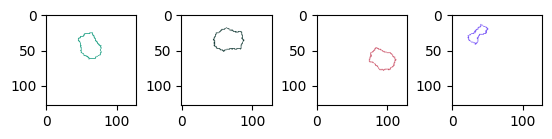

Different tasks in this dataset split: 
 ['task_rot']


Number of samples per task in this dataset split: 
 task
task_rot    5000
Name: count, dtype: int64


In [44]:
dataset_train_path = "./final_datasets/sys-gen/exp_setting_1/experiment_2/train.csv"
check_CVR_dataloader(dataset_train_path)
get_tasks_info(dataset_train_path)

Batch shape:  torch.Size([32, 4, 3, 128, 128])
Sample shape:  torch.Size([4, 3, 128, 128])


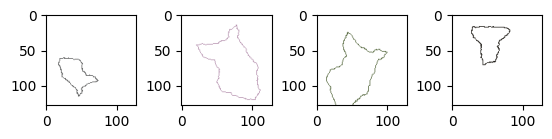

Different tasks in this dataset split: 
 ['task_rot']


Number of samples per task in this dataset split: 
 task
task_rot    1000
Name: count, dtype: int64


In [45]:
dataset_test_path = "./final_datasets/sys-gen/exp_setting_1/experiment_2/test_gen.csv"
check_CVR_dataloader(dataset_test_path)
get_tasks_info(dataset_test_path)
